In [54]:
import imageio as igio
import matplotlib.pyplot as plt
import numpy as np
import random

In [64]:
def my_mse( A, B):
    counter = 0
    for i in range(0,A.shape[0]):
        for j in range(0,A.shape[1]):
            counter += (A[i,j]- B[i,j])*(A[i,j]- B[i,j])
    print( 'aaa: ', str(np.sqrt(counter) ))
    
def fun1():
    im_shape = im.shape
    im_size = im_shape[0]*im_shape[1]
        
    counter = np.zeros([1,2])
#         counter[0,0] = 0
#         counter[0,1] = im_size
        
    T_i = 125
    T = int(TT)
    c = 0
        
    while( np.abs(T_i - T) > 0.5 ):
#             if( c == 0 ):
#                 T_i = TT
        print(str(T_i) + ' >?-1 ' + str(T))
        im = np.copy(im_ori)
        counter = np.zeros([1,2])
        counter_pix = np.zeros([1,2])
            
        for i in range(1,im_shape[0]):
            for j in range(1,im_shape[1]):
                if( im[i,j] <= T ):
                    counter_pix[0,0] += im[i,j]
                    im[i,j] = 0
                    counter[0,0] += 1
                else:
                    counter_pix[0,1] += im[i,j]
                    im[i,j] = 1
                    counter[0,1] += 1
            
        G1 = counter_pix[0,0] / counter[0,0]
        G2 = counter_pix[0,1] / counter[0,1]
            
        if(counter[0,0] == 0):
            G1 = 0
        if(counter[0,1] == 0):
            G2 = 0
        T = T_i
        T_i = 0.5*(G1+G2)
        print(str(T_i) + ' >? ' + str(T))
        print( str(G1) + ' + ' + str(G2), end = '\n' )
#             plt.figure(figsize = (10,10))
#             plt.imshow(im[:,:]*255, cmap = plt.get_cmap(name = 'gray'))
#             plt.colorbar()
            
        c += 1
def fun2():
    im = im
    im_shape = im.shape
#         print(im_shape)
        
    im_vector = np.zeros([1,im_shape[0]*im_shape[1]]) #vectorized of original image
    im_vector1 = np.zeros([1,im_shape[0]*im_shape[1]]) #temporal
#         print(im_shape[0]*im_shape[1])
        
    im_vector2 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #vectorized of original image with pos -1 +1 
    im_vector3 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #temporal
#         print(im_shape[0]*im_shape[1]+2)
        
    im_vector3[0] = im[im_shape[0]-1,im_shape[1]-1] 
    im_vector3[0,im_shape[0]*im_shape[1]+2 - 1] = im[0,0]
        
    idx = 0
    for i in range(0,im_shape[0]):
        for j in range(0,im_shape[1]):
            im_vector[0,idx] = im[i,j]
            idx += 1
                
#         print(im_vector)
    im_vector3[0,1:im_shape[0]*im_shape[1]+1] = im_vector[0,:]
#         print(im_vector3)
                    
    filter = w #[0.5,0.3,0.2]
    n = int(np.floor( w.shape[1]/2 ))
#         print(filter)
        
    for i in range(n,im_shape[0]*im_shape[1]+2-n):
        counter = 0
        i_x = i - n
        for x in range( 0, w.shape[1] ):
            counter += im_vector3[0, i_x] + filter[0, x]
            
        im_vector2[0,i-1] = counter # im_vector3[0,i-1] * filter[0] + im_vector3[0,i] * filter[1] + im_vector3[0,i+1] * filter[2]
#             print( str(im_vector3[0,i-1])+'*'+str(filter[0])+' + '+str(im_vector3[0,i])+'*'+str(filter[1])+' + '+str(im_vector3[0,i+1])+'*'+str(filter[2])+' = '+str(im_vector2[0,i-1]))
#         print(im_vector2)
        
    idx = 0
    for i in range(0,im_shape[0]):
        for j in range(0,im_shape[1]):
            im[i,j] = im_vector2[0,idx]
            idx += 1
#         plt.figure(figsize = (10,10))
#         plt.imshow(im[:,:], cmap = plt.get_cmap(name = 'gray'))
#         plt.colorbar()

def fun3():
    III = np.zeros([ im.shape[0]+2, im.shape[1]+2])
#         print(III)
        
    III[0,1:III.shape[1]-1] = im[0,:] ##top row
    III[III.shape[0]-1,1:III.shape[1]-1] = im[im.shape[0]-1,:].shape ##down row

    III[1:III.shape[0]-1,0] = im[:,0].shape ##first column
    III[1:III.shape[0]-1,III.shape[1]-1] = im[:,im.shape[1]-1].shape ##last column

    #corners
    III[0,0] = im[0,0] #left up
    III[III.shape[0]-1,0] = im[im.shape[0]-1,0] #left down
    III[0,III.shape[1]-1] = im[0,im.shape[1]-1] #right up
    III[III.shape[0]-1,III.shape[1]-1] = im[im.shape[0]-1,im.shape[1]-1] #right down

    III[1:III.shape[0]-1,1:III.shape[1]-1] = im[0:im.shape[0],0:im.shape[1]] #inside matrix

#         print(III)
        
#         w = [[-1,-1,-1],
#              [0,0],
#              [1,1,1]]
#         ww = np.zeros([3,3])
    ww = w#np.array(w)
#         print(ww)
        
    II_c = np.zeros([im.shape[0],im.shape[1]])
#         print(II_c)

#         plt.figure(figsize = (5,5))
#         plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
#         plt.colorbar()

    for i in range(1,III.shape[0]-1):
        for j in range(1,III.shape[1]-1):
            c = 0
            i_x = i - 1 
            for x in range(0,ww.shape[0]):
                i_y = j - 1
                for y in range(0,ww.shape[1]):
                    c += ww[x,y] * III[i_x,i_y]
    #                 print(str(ww[x,y]) + ' ' + str(III[i_x,i_y]))
                    i_y += 1
                i_x += 1
            II_c[i-1,j-1] = c
#         print(II_c)
    II_c = II_c.astype('uint8')

#         my_fun(II_c,method=1)

    plt.figure(figsize = (10,10))
    plt.imshow(II_c[:,:], cmap = plt.get_cmap(name = 'gray'))
    plt.colorbar()

def fun4():
    III = np.zeros([ im.shape[0]+2, im.shape[1]+2])
#         print(III)
        
    III[0,1:III.shape[1]-1] = np.zeros(im[0,:].shape) ##top row
    III[III.shape[0]-1,1:III.shape[1]-1] = np.zeros(im[im.shape[0]-1,:].shape) ##down row

    III[1:III.shape[0]-1,0] = np.zeros(im[:,0].shape) ##first column
    III[1:III.shape[0]-1,III.shape[1]-1] = np.zeros(im[:,im.shape[1]-1].shape) ##last column

    #corners
    III[0,0] = im[0,0] #left up
    III[III.shape[0]-1,0] = im[im.shape[0]-1,0] #left down
    III[0,III.shape[1]-1] = im[0,im.shape[1]-1] #right up
    III[III.shape[0]-1,III.shape[1]-1] = im[im.shape[0]-1,im.shape[1]-1] #right down

    III[1:III.shape[0]-1,1:III.shape[1]-1] = im[0:im.shape[0],0:im.shape[1]] #inside matrix

#         print(III)
        
    II_c = np.zeros([im.shape[0],im.shape[1]])
#         print(II_c)

#         plt.figure(figsize = (5,5))
#         plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
#         plt.colorbar()
        
    w = np.zeros([1,9])
    print(w.shape)
    cc = 0
        
    for i in range(1,III.shape[0]-1):
        for j in range(1,III.shape[1]-1):
            i_x = i - 1 
            for x in range(0,3):
                i_y = j - 1
                for y in range(0,3):
                    w[0,cc] = III[i_x,i_y]
                    cc += 1
                    i_y += 1
                i_x += 1
#                 print(cc)
            if( cc == w.shape[1] ):
                w = np.sort(w)
                c = 0
#               print(w)
                if( np.mod(int(w.shape[1]),2) != 0 ):
                    c = w[0,int(np.floor(w.shape[1]/2))]
                else:
                    c = w[0,int(w.shape[1]/2)]
                II_c[i-1,j-1] = c
                w = np.zeros([1,9])
                cc = 0
#         print(II_c)

    II_c = II_c.astype('uint8')

    plt.figure(figsize = (10,10))
    plt.imshow(II_c[:,:], cmap = plt.get_cmap(name = 'gray'))
    plt.colorbar()

def my_fun( filename='frame0.jpg', method='1', TT=125, size_filter=0, w=[] ):
    
    im =igio.imread(filename)
    im_ori = np.copy(im)
    
    plt.figure(figsize = (10,10))
    plt.imshow(im[:,:], cmap = plt.get_cmap(name = 'gray'))
    plt.colorbar()
    
    if( method == 1 ):
        im_shape = im.shape
        im_size = im_shape[0]*im_shape[1]
        
        counter = np.zeros([1,2])
#         counter[0,0] = 0
#         counter[0,1] = im_size
        
        T_i = 125
        T = int(TT)
        c = 0
        
        while( np.abs(T_i - T) > 0.5 ):
#             if( c == 0 ):
#                 T_i = TT
            print(str(T_i) + ' >?-1 ' + str(T))
            im = np.copy(im_ori)
            counter = np.zeros([1,2])
            counter_pix = np.zeros([1,2])
            
            for i in range(1,im_shape[0]):
                for j in range(1,im_shape[1]):
                    if( im[i,j] <= T ):
                        counter_pix[0,0] += im[i,j]
                        im[i,j] = 0
                        counter[0,0] += 1
                    else:
                        counter_pix[0,1] += im[i,j]
                        im[i,j] = 1
                        counter[0,1] += 1
            
            G1 = counter_pix[0,0] / counter[0,0]
            G2 = counter_pix[0,1] / counter[0,1]
            
            if(counter[0,0] == 0):
                G1 = 0
            if(counter[0,1] == 0):
                G2 = 0
            T = T_i
            T_i = 0.5*(G1+G2)
            print(str(T_i) + ' >? ' + str(T))
            print( str(G1) + ' + ' + str(G2), end = '\n' )
#             plt.figure(figsize = (10,10))
#             plt.imshow(im[:,:]*255, cmap = plt.get_cmap(name = 'gray'))
#             plt.colorbar()
            
            c += 1
    
    if( method == 2 ):
        im = im
        im_shape = im.shape
#         print(im_shape)
        
        im_vector = np.zeros([1,im_shape[0]*im_shape[1]]) #vectorized of original image
        im_vector1 = np.zeros([1,im_shape[0]*im_shape[1]]) #temporal
#         print(im_shape[0]*im_shape[1])
        
        im_vector2 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #vectorized of original image with pos -1 +1 
        im_vector3 = np.zeros([1,im_shape[0]*im_shape[1]+2]) #temporal
#         print(im_shape[0]*im_shape[1]+2)
        
        im_vector3[0] = im[im_shape[0]-1,im_shape[1]-1] 
        im_vector3[0,im_shape[0]*im_shape[1]+2 - 1] = im[0,0]
        
        idx = 0
        for i in range(0,im_shape[0]):
            for j in range(0,im_shape[1]):
                im_vector[0,idx] = im[i,j]
                idx += 1
                
#         print(im_vector)
        im_vector3[0,1:im_shape[0]*im_shape[1]+1] = im_vector[0,:]
#         print(im_vector3)
                    
        filter = w #[0.5,0.3,0.2]
        n = int(np.floor( w.shape[1]/2 ))
#         print(filter)
        
        for i in range(n,im_shape[0]*im_shape[1]+2-n):
            counter = 0
            i_x = i - n
            for x in range( 0, w.shape[1] ):
                counter += im_vector3[0, i_x] + filter[0, x]
            
            im_vector2[0,i-1] = counter # im_vector3[0,i-1] * filter[0] + im_vector3[0,i] * filter[1] + im_vector3[0,i+1] * filter[2]
#             print( str(im_vector3[0,i-1])+'*'+str(filter[0])+' + '+str(im_vector3[0,i])+'*'+str(filter[1])+' + '+str(im_vector3[0,i+1])+'*'+str(filter[2])+' = '+str(im_vector2[0,i-1]))
#         print(im_vector2)
        
        idx = 0
        for i in range(0,im_shape[0]):
            for j in range(0,im_shape[1]):
                im[i,j] = im_vector2[0,idx]
                idx += 1
#         plt.figure(figsize = (10,10))
#         plt.imshow(im[:,:], cmap = plt.get_cmap(name = 'gray'))
#         plt.colorbar()
    
    if( method == 3 ):
        
        III = np.zeros([ im.shape[0]+2, im.shape[1]+2])
#         print(III)
        
        III[0,1:III.shape[1]-1] = im[0,:] ##top row
        III[III.shape[0]-1,1:III.shape[1]-1] = im[im.shape[0]-1,:].shape ##down row

        III[1:III.shape[0]-1,0] = im[:,0].shape ##first column
        III[1:III.shape[0]-1,III.shape[1]-1] = im[:,im.shape[1]-1].shape ##last column

        #corners
        III[0,0] = im[0,0] #left up
        III[III.shape[0]-1,0] = im[im.shape[0]-1,0] #left down
        III[0,III.shape[1]-1] = im[0,im.shape[1]-1] #right up
        III[III.shape[0]-1,III.shape[1]-1] = im[im.shape[0]-1,im.shape[1]-1] #right down

        III[1:III.shape[0]-1,1:III.shape[1]-1] = im[0:im.shape[0],0:im.shape[1]] #inside matrix

#         print(III)
        
#         w = [[-1,-1,-1],
#              [0,0],
#              [1,1,1]]
#         ww = np.zeros([3,3])
        ww = w#np.array(w)
#         print(ww)
        
        II_c = np.zeros([im.shape[0],im.shape[1]])
#         print(II_c)

#         plt.figure(figsize = (5,5))
#         plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
#         plt.colorbar()

        for i in range(1,III.shape[0]-1):
            for j in range(1,III.shape[1]-1):
                c = 0
                i_x = i - 1 
                for x in range(0,ww.shape[0]):
                    i_y = j - 1
                    for y in range(0,ww.shape[1]):
                        c += ww[x,y] * III[i_x,i_y]
        #                 print(str(ww[x,y]) + ' ' + str(III[i_x,i_y]))
                        i_y += 1
                    i_x += 1
                II_c[i-1,j-1] = c
#         print(II_c)
        II_c = II_c.astype('uint8')

#         my_fun(II_c,method=1)

        plt.figure(figsize = (10,10))
        plt.imshow(II_c[:,:], cmap = plt.get_cmap(name = 'gray'))
        plt.colorbar()

    
    if( method == 4 ):
        
        III = np.zeros([ im.shape[0]+2, im.shape[1]+2])
#         print(III)
        
        III[0,1:III.shape[1]-1] = np.zeros(im[0,:].shape) ##top row
        III[III.shape[0]-1,1:III.shape[1]-1] = np.zeros(im[im.shape[0]-1,:].shape) ##down row

        III[1:III.shape[0]-1,0] = np.zeros(im[:,0].shape) ##first column
        III[1:III.shape[0]-1,III.shape[1]-1] = np.zeros(im[:,im.shape[1]-1].shape) ##last column

        #corners
        III[0,0] = im[0,0] #left up
        III[III.shape[0]-1,0] = im[im.shape[0]-1,0] #left down
        III[0,III.shape[1]-1] = im[0,im.shape[1]-1] #right up
        III[III.shape[0]-1,III.shape[1]-1] = im[im.shape[0]-1,im.shape[1]-1] #right down

        III[1:III.shape[0]-1,1:III.shape[1]-1] = im[0:im.shape[0],0:im.shape[1]] #inside matrix

#         print(III)
        
        II_c = np.zeros([im.shape[0],im.shape[1]])
#         print(II_c)

#         plt.figure(figsize = (5,5))
#         plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
#         plt.colorbar()
        
        w = np.zeros([1,9])
        print(w.shape)
        cc = 0
        
        for i in range(1,III.shape[0]-1):
            for j in range(1,III.shape[1]-1):
                i_x = i - 1 
                for x in range(0,3):
                    i_y = j - 1
                    for y in range(0,3):
                        w[0,cc] = III[i_x,i_y]
                        cc += 1
                        i_y += 1
                    i_x += 1
#                 print(cc)
                if( cc == w.shape[1] ):
                    w = np.sort(w)
                    c = 0
#                     print(w)
                    if( np.mod(int(w.shape[1]),2) != 0 ):
                        c = w[0,int(np.floor(w.shape[1]/2))]
                    else:
                        c = w[0,int(w.shape[1]/2)]
                    II_c[i-1,j-1] = c
                    w = np.zeros([1,9])
                    cc = 0
#         print(II_c)

        II_c = II_c.astype('uint8')

        plt.figure(figsize = (10,10))
        plt.imshow(II_c[:,:], cmap = plt.get_cmap(name = 'gray'))
        plt.colorbar()
               

    print('mse: ' + str(my_mse(im_ori,im)))

baboon.png
2
3
1
2
3


/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in ubyte_scalars
  """


aaa:  5229.165134129921
mse: None


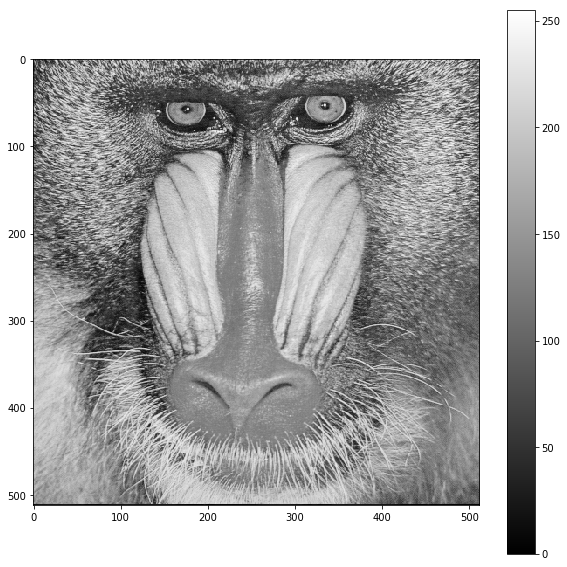

In [65]:
#def my_fun( filename='frame0.jpg', method='1', TT=125, size_filter=0, w=[] ):
filename = str(input()).rstrip()
# R = igio.imread(filename)

method = int(input())
if( method == 1):
    T =  int(input())
    my_fun(filename,method=method,TT=T)
elif( method == 2 ):
    size_filter = int(input())
    w = np.zeros([1,size_filter])
    for i in range(0,size_filter):
        w[0,i] = int(input())
    my_fun(filename,method=method, size_filter=size_filter, w=w)
elif( method == 3 ):
    size_filter = int(input())
    w = np.zeros([size_filter,size_filter])
    for i in range(0,size_filter):
        for j in range(0,size_filter):
            w[i,j] = int(input())
    T =  int(input())
    my_fun(filename,method=method,TT=T, size_filter=size_filter, w=w)
elif( method == 4 ):
    size_filter = int(input())
    my_fun(filename,method=method, size_filter=size_filter)

In [ ]:
I = [[1,2,3,4,5,6],[7,8,9,10,11,12],[13,14,15,16,17,18],[19,20,21,22,23,24],[25,26,27,28,29,30],[31,32,33,34,35,36]]
print(I)
II = np.zeros([6,6])
print(II)
II = np.array(I)
print(II)

In [ ]:
w = [[-1,-1,-1],[0,0,0],[1,1,1]]
ww = np.zeros([3,3])
print(w)
ww = np.array(w)
print(ww)

In [ ]:
III = np.zeros([ II.shape[0]+2, II.shape[1]+2])
print(III)
III[0,1:III.shape[1]-1] = II[0,:]
III[III.shape[0]-1,1:III.shape[1]-1] = II[II.shape[1]-1,:]

III[1:III.shape[0]-1,0] = II[:,0]
III[1:III.shape[0]-1,III.shape[1]-1] = II[:,II.shape[1]-1]

III[0,0] = II[0,0]
III[III.shape[0]-1,0] = II[II.shape[0]-1,0]
III[0,III.shape[1]-1] = II[0,II.shape[1]-1]
III[III.shape[0]-1,III.shape[1]-1] = II[II.shape[1]-1,II.shape[1]-1]

III[1:III.shape[0]-1,1:III.shape[1]-1] = II[0:II.shape[0],0:II.shape[1]]

print(III)

In [ ]:
II = np.array(I)
II_c = np.array(II)
print(II_c)

plt.figure(figsize = (5,5))
plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
plt.colorbar()

for i in range(1,III.shape[0]-1):
    for j in range(1,III.shape[1]-1):
        c = 0
        i_x = i - 1 
        for x in range(0,ww.shape[0]):
            i_y = j - 1
            for y in range(0,ww.shape[1]):
                c += ww[x,y] * III[i_x,i_y]
#                 print(str(ww[x,y]) + ' ' + str(III[i_x,i_y]))
                i_y += 1
            i_x += 1
        II_c[i-1,j-1] = c
print(II_c)

plt.figure(figsize = (5,5))
plt.imshow(II_c, cmap = plt.get_cmap(name = 'gray'))
plt.colorbar()       

In [ ]:
v = 9
print(v)

In [ ]:
x = np.ones([1,10])*random.random() +list(range(0,10))
print(np.sort(x))